### Seam Carving
Example notebook to run seam carving
Images uploaded are public domain. from www.pexels.com and www.pixbay.com

In [1]:
import sc_utils
from sc_utils import *
help(sc_utils)

#requires opencv, numpy, matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

Help on module sc_utils:

NAME
    sc_utils

DESCRIPTION
    utilities hack to run seam carver
    Requires ffmpeg

FUNCTIONS
    ffconvert(file_in, file_out, imsize)
        converts image to bgra and rotates counter clockwise if needed
        gpu-seamcarving only considers vertical seams
    
    ffgetformat(file_in)
        check if image is correct format for seam carving
    
    ffgetsize(file_in)
        fast method to get image size in python
    
    ffresize(file_in, file_out)
        resizes to max width: 1024
    
    ffrotate(file_in, file_out)
        rotates image clockwise
    
    get_file(folder, file)
    
    get_folder(folder)
    
    remove_seams(file_in, file_out, n_seams, gpu=False)
    
    set_file(folder, file, ext)

FILE
    /home/z/work/gits/gpu-seamcarving/sc_utils.py




In [2]:
fnames = ['boat-1024.bmp', 'action-activity-athlete-163487.jpg', 
         'athletes-baseball-baseball-players-159567.jpg','pexels-photo-209804.jpeg',
         'ireland-1985088_1280.jpg']

In [3]:
def to_square(file_in, gpu=False):
    """seam carve rectangular images to square"""
    _rotate = False
    _in_images = 'images'
    _out_images = 'outputs'

    _temp_fname = set_file(_in_images, file_in, '.bmp')
    _out_fname = set_file(_out_images, file_in, '.bmp')

    _file = get_file(_in_images, file_in)
    _imsize = ffgetsize(_file)
    _fmt = ffgetformat(_file)

    #image is already square, do nothing
    if _imsize[0] == _imsize[1]:
        copyfile(file_in, os.path.join(_out_images, os.path.basename(file_in)))

    # convert to bgra .bmp, rotate if necessary, rescale to 1024 maxwidth
    ffconvert(_file, _temp_fname, _imsize)
    
    n_seams = abs(_imsize[0]-_imsize[1])
    maxsize = max(_imsize[0],_imsize[1]) 
    if maxsize > 1024:
        n_seams = int(n_seams*1024/maxsize)
    
    remove_seams(_temp_fname, _out_fname, n_seams=n_seams, gpu=gpu)

    if _imsize[1] > _imsize[0]:
        ffrotate(_out_fname, _out_fname)
    
    return _file, _out_fname

In [4]:
def show_two_files(file1, file2):
    im_in = np.array(cv2.cvtColor(cv2.imread(file1), cv2.COLOR_BGR2RGB))
    im_out = np.array(cv2.cvtColor(cv2.imread(file2), cv2.COLOR_BGR2RGB))

    plt.figure(figsize=(20,6))
    plt.subplot(121)
    plt.imshow(im_in)
    plt.subplot(122)
    plt.imshow(im_out)
    plt.show()

cuda/driver.out -n 448 -i images/boat-1024.bmp -o outputs/boat-1024.bmp


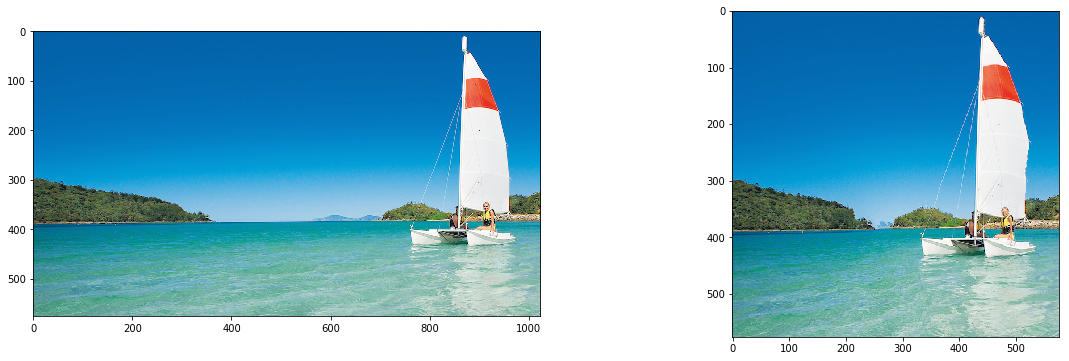

In [5]:
_fi, _fo = to_square(fnames[0], gpu=True)
show_two_files(_fi, _fo)

cuda/driver.out -n 341 -i images/action-activity-athlete-163487.bmp -o outputs/action-activity-athlete-163487.bmp


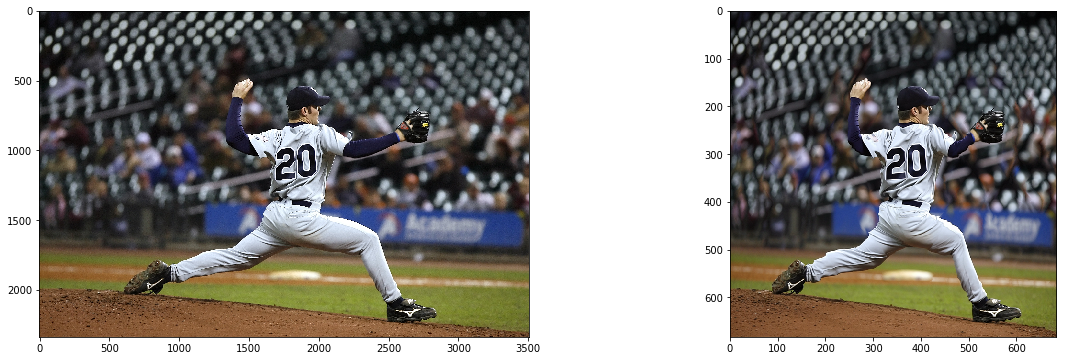

In [6]:
_fi, _fo = to_square(fnames[1], gpu=True)
show_two_files(_fi, _fo)

cuda/driver.out -n 292 -i images/athletes-baseball-baseball-players-159567.bmp -o outputs/athletes-baseball-baseball-players-159567.bmp


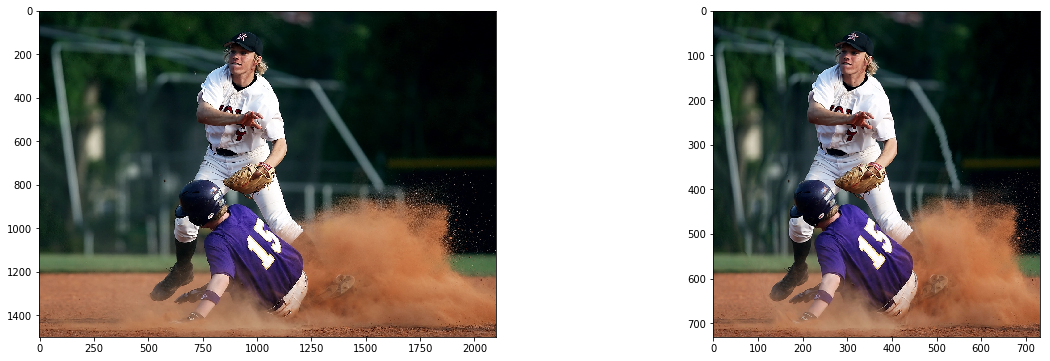

In [7]:
_fi, _fo = to_square(fnames[2], gpu=True)
show_two_files(_fi, _fo)

cuda/driver.out -n 292 -i images/pexels-photo-209804.bmp -o outputs/pexels-photo-209804.bmp


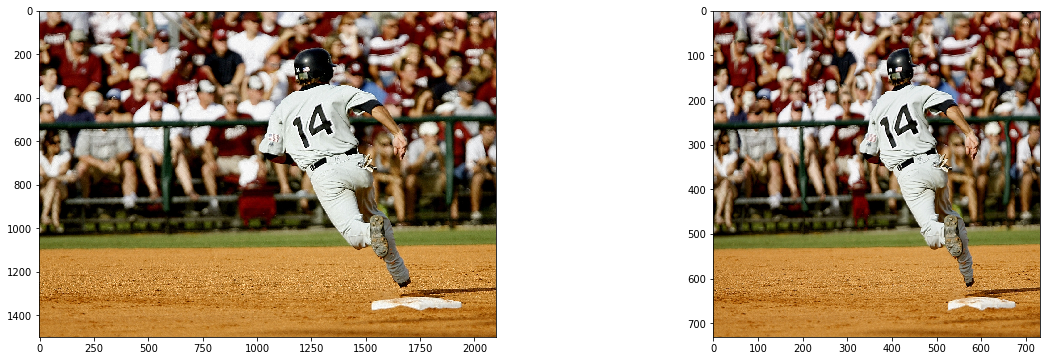

In [8]:
_fi, _fo = to_square(fnames[3], gpu=True)
show_two_files(_fi, _fo)

cuda/driver.out -n 256 -i images/ireland-1985088_1280.bmp -o outputs/ireland-1985088_1280.bmp


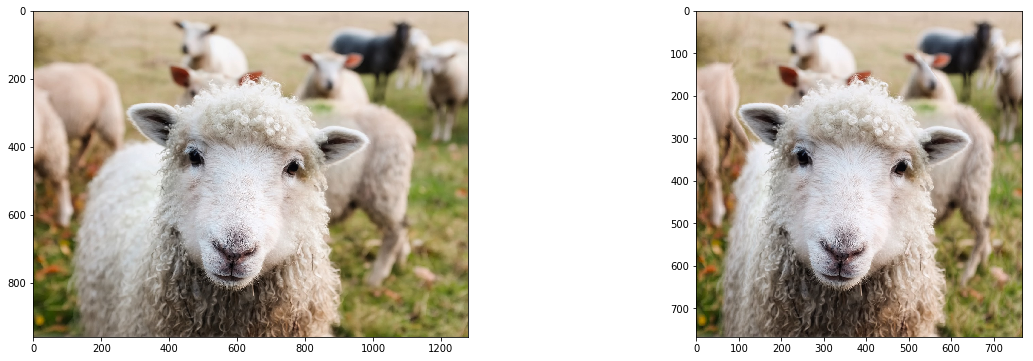

In [9]:
_fi, _fo = to_square(fnames[4], gpu=True)
show_two_files(_fi, _fo)